In [1]:
import os
os.chdir('../py')

import gc

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

from scipy.stats import ks_2samp

import datetime

import super_aggre

In [2]:
train = pd.read_pickle('../input/pickle/train_df.pkl')
test  = pd.read_pickle('../input/pickle/test_df.pkl')

In [35]:
[col for col in train.columns if col not in ['DT_M', 'card1']]

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66

In [3]:
pd.read_pickle('../input/pickle/remove_features.pkl')

,features_to_remove
0,TransactionID
1,TransactionDT
2,isFraud
3,DT
4,DT_M
5,DT_W
6,DT_D
7,DT_hour
8,DT_day_week
9,DT_day_month


In [4]:
EDA.max_disp(train.head())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday,DT_M_total,DT_W_total,DT_D_total,uid,uid2,uid3,uid4,uid5,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,uid_fq_enc,uid2_fq_enc,uid3_fq_enc,uid4_fq_enc,uid5_fq_enc,bank_type,card3_DT_D_hour_dist,card3_DT_W_week_day_dist,card3_DT_M_month_day_dist,card3_DT_D_hour_dist_best,card3_DT_W_week_day_dist_best,card3_DT_M_month_day_dist_best,card5_DT_D_hour_dist,card5_DT_W_week_day_dist,card5_DT_M_month_day_dist,card5_DT_D_hour_dist_best,card5_DT_W_week_day_dist_best,card5_DT_M_month_day_dist_best,bank_type_DT_D_hour_dist,bank_type_DT_W_week_day_dist,bank_type_DT_M_month_day_dist,bank_type_DT_D_hour_dist_best,bank_type_DT_W_week_day_dist_best,bank_type_DT_M_month_day_dist_best,bank_type_DT_M,bank_type_DT_W,bank_type_DT_D,uid_D1_mean,uid_D1_std,uid2_D1_mean,uid2_D1_std,uid3_D1_mean,uid3_D1_std,uid4_D1_mean,uid4_D1_std,uid5_D1_mean,uid5_D1_std,bank_type_D1_mean,bank_type_D1_std,uid_D2_mean,uid_D2_std,uid2_D2_mean,uid2_D2_std,uid3_D2_mean,uid3_D2_std,uid4_D2_mean,uid4_D2_std,uid5_D2_mean,uid5_D2_std,bank_type_D2_mean,bank_type_D2_std,uid_D3_mean,uid_D3_std,uid2_D3_mean,uid2_D3_std,uid3_D3_mean,uid3_D3_std,uid4_D3_mean,uid4_D3_std,uid5_D3_mean,uid5_D3_std,bank_type_D3_mean,bank_type_D3_std,uid_D4_mean,uid_D4_std,uid2_D4_mean,uid2_D4_std,uid3_D4_mean,uid3_D4_std,uid4_D4_mean,uid4_D4_std,uid5_D4_mean,uid5_D4_std,bank_type_D4_mean,bank_type_D4_std,uid_D5_mean,uid_D5_std,uid2_D5_mean,uid2_D5_std,uid3_D5_mean,uid3_D5_std,uid4_D5_mean,uid4_D5_std,uid5_D5_mean,uid5_D5_std,bank_type_D5_mean,bank_type_D5_std,uid_D6_mean,uid_D6_std,uid2_D6_mean,uid2_D6_std,uid3_D6_mean,uid3_D6_std,uid4_D6_mean,uid4_D6_std,uid5_D6_mean,uid5_D6_std,bank_type_D6_mean,bank_type_D6_std,uid_D7_mean,uid_D7_std,uid2_D7_mean,uid2_D7_std,uid3_D7_mean,uid3_D7_std,uid4_D7_mean,uid4_D7_std,uid5_D7_mean,uid5_D7_std,bank_type_D7_mean,bank_type_D7_std,uid_D8_mean,uid_D8_std,uid2_D8_mean,uid2_D8_std,uid3_D8_mean,uid3_D8_std,uid4_D8_mean,uid4_D8_std,uid5_D8_mean,uid5_D8_std,bank_type_D8_mean,bank_type_D8_std,uid_D9_mean,uid_D9_std,uid2_D9_mean,uid2_D9_std,uid3_D9_mean,uid3_D9_std,uid

In [11]:
EDA.max_disp(train.tail())

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,DT,DT_M,DT_W,DT_D,DT_hour,DT_day_week,DT_day_month,is_december,is_holiday,DT_M_total,DT_W_total,DT_D_total,uid,uid2,uid3,uid4,uid5,card1_fq_enc,card2_fq_enc,card3_fq_enc,card5_fq_enc,uid_fq_enc,uid2_fq_enc,uid3_fq_enc,uid4_fq_enc,uid5_fq_enc,bank_type,card3_DT_D_hour_dist,card3_DT_W_week_day_dist,card3_DT_M_month_day_dist,card3_DT_D_hour_dist_best,card3_DT_W_week_day_dist_best,card3_DT_M_month_day_dist_best,card5_DT_D_hour_dist,card5_DT_W_week_day_dist,card5_DT_M_month_day_dist,card5_DT_D_hour_dist_best,card5_DT_W_week_day_dist_best,card5_DT_M_month_day_dist_best,bank_type_DT_D_hour_dist,bank_type_DT_W_week_day_dist,bank_type_DT_M_month_day_dist,bank_type_DT_D_hour_dist_best,bank_type_DT_W_week_day_dist_best,bank_type_DT_M_month_day_dist_best,bank_type_DT_M,bank_type_DT_W,bank_type_DT_D,uid_D1_mean,uid_D1_std,uid2_D1_mean,uid2_D1_std,uid3_D1_mean,uid3_D1_std,uid4_D1_mean,uid4_D1_std,uid5_D1_mean,uid5_D1_std,bank_type_D1_mean,bank_type_D1_std,uid_D2_mean,uid_D2_std,uid2_D2_mean,uid2_D2_std,uid3_D2_mean,uid3_D2_std,uid4_D2_mean,uid4_D2_std,uid5_D2_mean,uid5_D2_std,bank_type_D2_mean,bank_type_D2_std,uid_D3_mean,uid_D3_std,uid2_D3_mean,uid2_D3_std,uid3_D3_mean,uid3_D3_std,uid4_D3_mean,uid4_D3_std,uid5_D3_mean,uid5_D3_std,bank_type_D3_mean,bank_type_D3_std,uid_D4_mean,uid_D4_std,uid2_D4_mean,uid2_D4_std,uid3_D4_mean,uid3_D4_std,uid4_D4_mean,uid4_D4_std,uid5_D4_mean,uid5_D4_std,bank_type_D4_mean,bank_type_D4_std,uid_D5_mean,uid_D5_std,uid2_D5_mean,uid2_D5_std,uid3_D5_mean,uid3_D5_std,uid4_D5_mean,uid4_D5_std,uid5_D5_mean,uid5_D5_std,bank_type_D5_mean,bank_type_D5_std,uid_D6_mean,uid_D6_std,uid2_D6_mean,uid2_D6_std,uid3_D6_mean,uid3_D6_std,uid4_D6_mean,uid4_D6_std,uid5_D6_mean,uid5_D6_std,bank_type_D6_mean,bank_type_D6_std,uid_D7_mean,uid_D7_std,uid2_D7_mean,uid2_D7_std,uid3_D7_mean,uid3_D7_std,uid4_D7_mean,uid4_D7_std,uid5_D7_mean,uid5_D7_std,bank_type_D7_mean,bank_type_D7_std,uid_D8_mean,uid_D8_std,uid2_D8_mean,uid2_D8_std,uid3_D8_mean,uid3_D8_std,uid4_D8_mean,uid4_D8_std,uid5_D8_mean,uid5_D8_std,bank_type_D8_mean,bank_type_D8_std,uid_D9_mean,uid_D9_std,uid2_D9_mean,uid2_D9_std,uid3_D9_mean,uid3_D9_std,uid

In [14]:
df = pd.concat([train[['DT_M', 'isFraud', 'card1', 'addr1']], test[['DT_M', 'isFraud', 'card1', 'addr1']]])

In [19]:
df['card1'].isnull().sum()

20934

In [ ]:
train['product_type_DT_D']

In [31]:
t0 = train[train['isFraud'] == 0]
t1 = train[train['isFraud'] == 1]

In [45]:
[col for col in train.columns if 'Device' in col]

['DeviceType', 'DeviceInfo', 'DeviceInfo_device', 'DeviceInfo_version']

In [44]:
train['DeviceInfo'].value_counts()

811091    446307
92710      47722
52417      25567
38502      19782
23722      12573
12330       7440
2650        1901
968          962
829          549
6            496
804          461
5            457
682          410
376          362
9            361
11           357
10           346
450          334
165          332
7            330
217          329
334          328
12           326
25           320
980          316
458          312
52           303
192          298
308          290
176          276
           ...  
133           63
56            63
257           63
210           61
193           61
156           61
104           60
97            59
145           54
50            50
102           49
96            47
82            46
69            45
98            42
67            42
79            40
77            40
53            37
71            29
63            27
37            24
92            24
124           17
129           17
91            16
64            11
159           

In [50]:
from scipy.stats import gaussian_kde

In [52]:
gaussian_kde(t0['card1'].dropna())

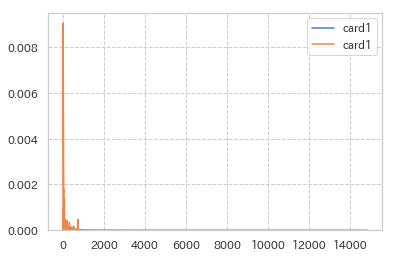

In [49]:
sns.kdeplot(t0['card1'].value_counts())
sns.kdeplot(t1['card1'].value_counts())

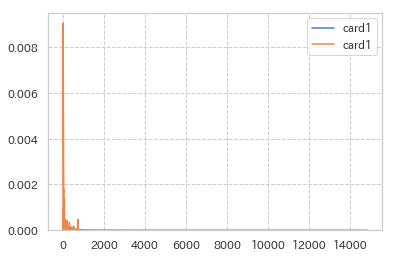

In [49]:
sns.kdeplot(t0['card1'].value_counts())
sns.kdeplot(t1['card1'].value_counts())

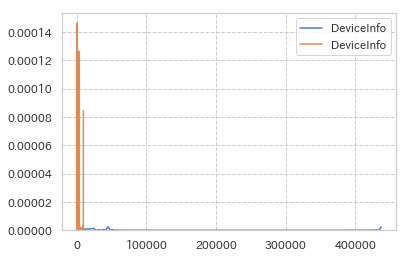

In [47]:
sns.kdeplot(t0['DeviceInfo'].value_counts())
sns.kdeplot(t1['DeviceInfo'].value_counts())

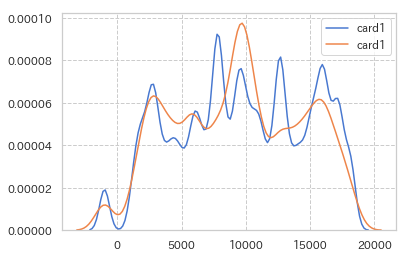

In [38]:
sns.kdeplot(t0['card1'].fillna(-999))
sns.kdeplot(t1['card1'].fillna(-999))

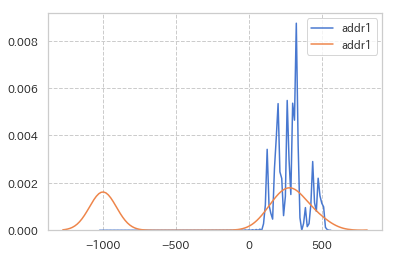

In [41]:
sns.kdeplot(t0['addr1'].fillna(-999))
sns.kdeplot(t1['addr1'].fillna(-999))

12


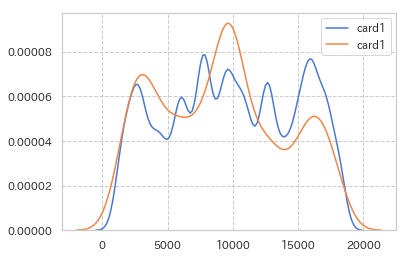

13


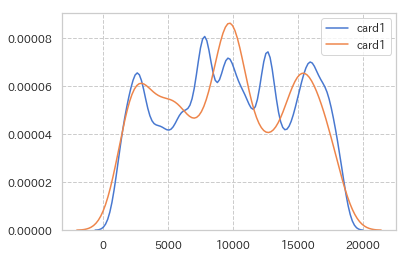

14


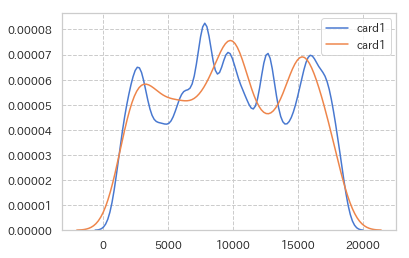

15


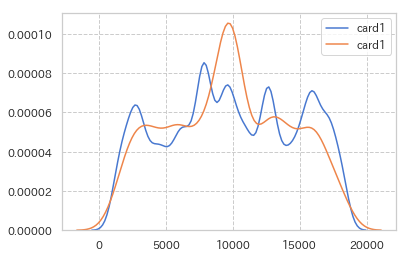

16


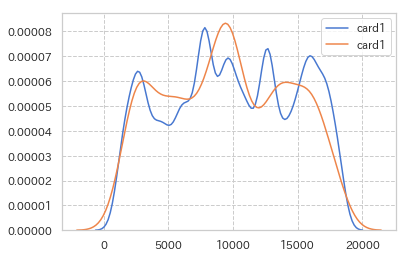

17


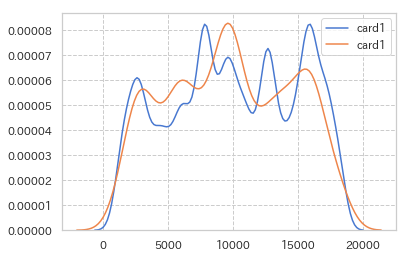

In [32]:
for m in t0['DT_M'].unique():
    print(m)
    sns.kdeplot(t0[t0['DT_M'] == m]['card1'])
    sns.kdeplot(t1[t1['DT_M'] == m]['card1'])
    plt.show()

12


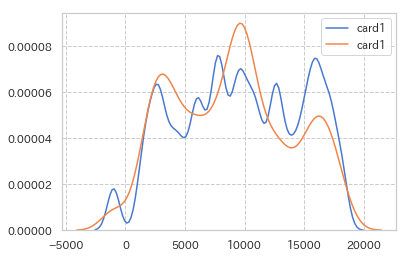

13


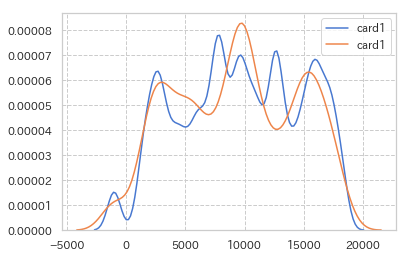

14


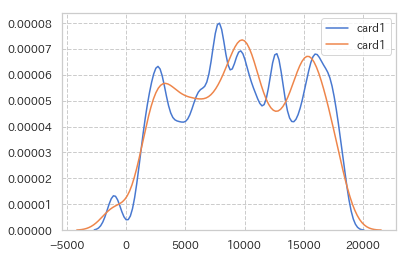

15


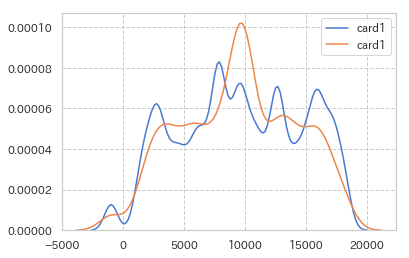

16


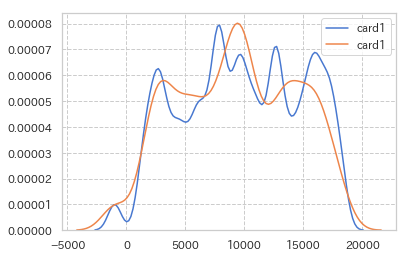

17


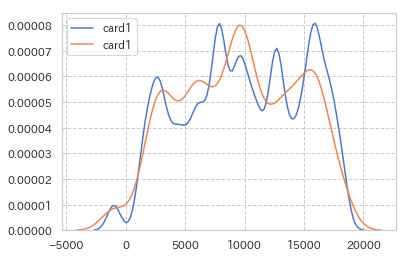

In [39]:
for m in t0['DT_M'].unique():
    print(m)
    sns.kdeplot(t0[t0['DT_M'] == m]['card1'].fillna(-999))
    sns.kdeplot(t1[t1['DT_M'] == m]['card1'].fillna(-999))
    plt.show()

12


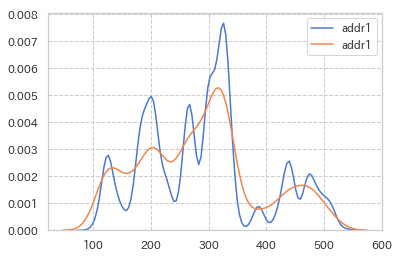

13


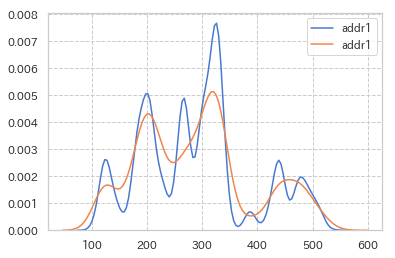

14


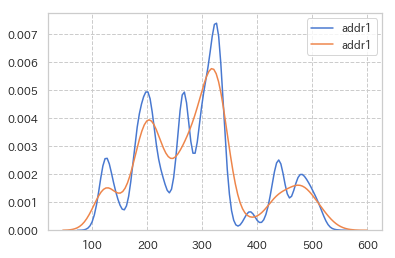

15


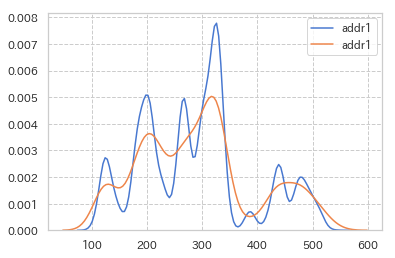

16


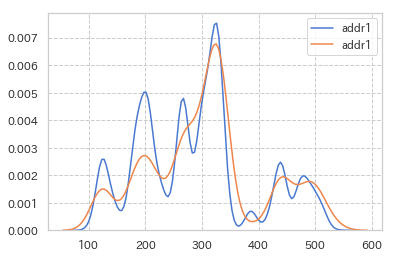

17


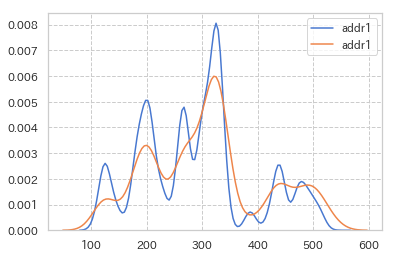

In [31]:
for m in t0['DT_M'].unique():
    print(m)
    sns.kdeplot(t0[t0['DT_M'] == m]['addr1'])
    sns.kdeplot(t1[t1['DT_M'] == m]['addr1'])
    plt.show()

12


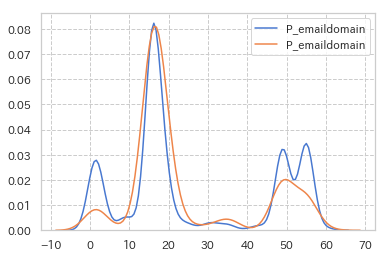

13


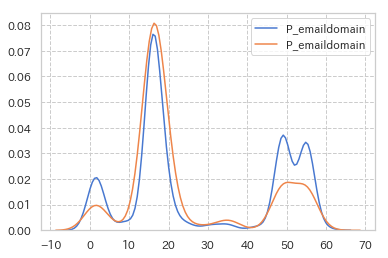

14


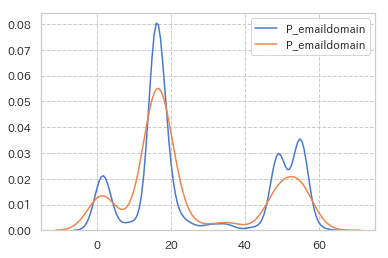

15


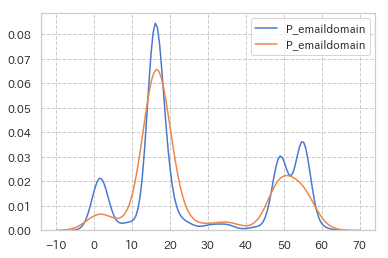

16


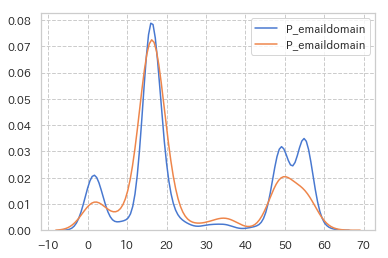

17


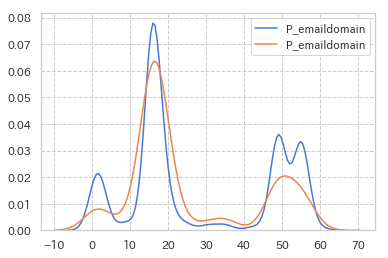

In [30]:
for m in t0['DT_M'].unique():
    print(m)
    sns.kdeplot(t0[t0['DT_M'] == m]['P_emaildomain'])
    sns.kdeplot(t1[t1['DT_M'] == m]['P_emaildomain'])
    plt.show()

12


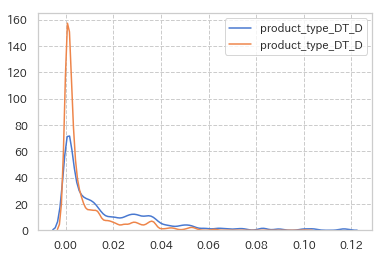

13


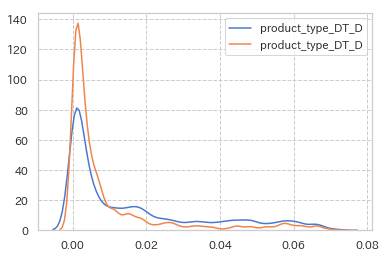

14


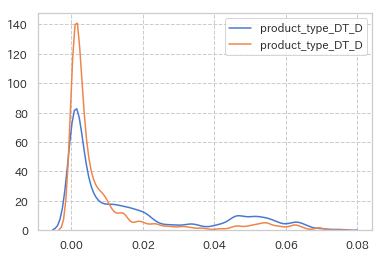

15


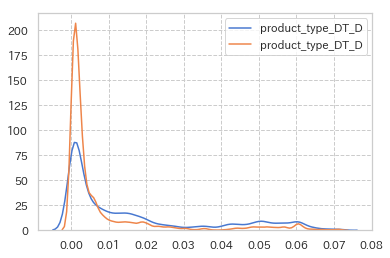

16


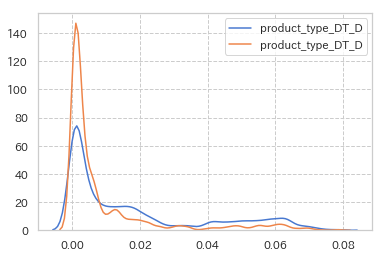

17


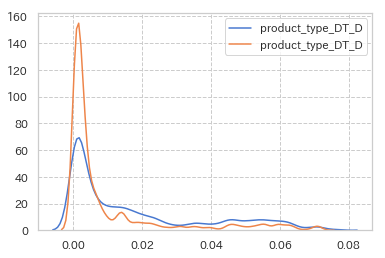

In [29]:
for m in t0['DT_M'].unique():
    print(m)
    sns.kdeplot(t0[t0['DT_M'] == m]['product_type_DT_D'])
    sns.kdeplot(t1[t1['DT_M'] == m]['product_type_DT_D'])
    plt.show()

In [ ]:
df[df['DT_M'] == 12]

In [21]:
pd.crosstab(index=df['card1'],
            columns=df['DT_M'],
            normalize='columns')

DT_M,12,13,14,15,16,17,19,20,21,22,23,24
card1,,,,,,,,,,,,
1001.0,0.000007,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000018
1004.0,0.000015,0.000000,0.000000,0.000010,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000012,0.000018
1006.0,0.000007,0.000000,0.000012,0.000000,0.000012,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000044
1007.0,0.000007,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,0.000000
1008.0,0.000000,0.000000,0.000024,0.000000,0.000000,0.000011,0.000013,0.000000,0.000000,0.000000,0.000012,0.000009
1009.0,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000040,0.000014,0.000000,0.000062,0.000026
1012.0,0.000037,0.000011,0.000000,0.000000,0.000012,0.000011,0.000026,0.000026,0.000000,0.000000,0.000000,0.000018
1013.0,0.000000,0.000000,0.000024,0.000060,0.000024,0.000011,0.000026,0.000013,0.000029,0.000013,0.000049,0.000035
1014.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000025,0.000000,0.000000


In [15]:
df.groupby('DT_M').mean()

,isFraud,card1,addr1
DT_M,,,
12,0.025852,9877.603634,291.50
13,0.040017,9873.462443,290.25
14,0.040072,9851.804027,290.50
15,0.039545,9866.553016,289.00
16,0.033806,9917.839529,291.50
17,0.034861,10049.207344,291.50
19,0.000000,9925.040564,290.50
20,0.000000,9953.578779,291.00
21,0.000000,9975.429713,291.75


In [6]:
train.groupby('DT_M').agg({'isFraud': 'mean'})

,isFraud
DT_M,
12,0.025852
13,0.040017
14,0.040072
15,0.039545
16,0.033806
17,0.034861


In [7]:
train.groupby('DT_M').agg({'isFraud': 'mean'}).shift(1)

,isFraud
DT_M,
12,NaN
13,0.025852
14,0.040017
15,0.040072
16,0.039545
17,0.033806


In [52]:
card_count = pd.crosstab(index=df['card1'],
                         columns=df['DT_M'],
                         normalize='columns')


lags = [0, 1, 2, 3, 4, 5, 6]
for lag in lags:
    df[f'card1_counts__lag{lag}'] = np.nan
    for num in df['DT_M'].unique():
        if (num - lag) < 12:
            pass
        elif (num - lag) == 18:
            pass
        else:
            df.loc[df['DT_M'] == num, f'card1_counts__lag{lag}'] = df[df['DT_M'] == num]['card1'].map(card_count[num - lag])

In [54]:
df

,DT_M,isFraud,card1,addr1,card1_counts__lag0,card1_counts__lag1,card1_counts__lag2,card1_counts__lag3,card1_counts__lag6,card1_counts__lag4,card1_counts__lag5
0,12,0,13926.0,315.0,0.000067,NaN,NaN,NaN,NaN,NaN,NaN
1,12,0,2755.0,325.0,0.001245,NaN,NaN,NaN,NaN,NaN,NaN
2,12,0,4663.0,330.0,0.001379,NaN,NaN,NaN,NaN,NaN,NaN
3,12,0,18132.0,476.0,0.006159,NaN,NaN,NaN,NaN,NaN,NaN
4,12,0,4497.0,420.0,0.000015,NaN,NaN,NaN,NaN,NaN,NaN
5,12,0,5937.0,272.0,0.000022,NaN,NaN,NaN,NaN,NaN,NaN
6,12,0,12308.0,126.0,0.000291,NaN,NaN,NaN,NaN,NaN,NaN
7,12,0,12695.0,325.0,0.010790,NaN,NaN,NaN,NaN,NaN,NaN
8,12,0,2803.0,337.0,0.009522,NaN,NaN,NaN,NaN,NaN,NaN
9,12,0,17399.0,204.0,0.002528,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
card_count

DT_M,12,13,14,15,16,17,19,20,21,22,23,24
card1,,,,,,,,,,,,
1001.0,0.000007,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000018
1004.0,0.000015,0.000000,0.000000,0.000010,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000012,0.000018
1006.0,0.000007,0.000000,0.000012,0.000000,0.000012,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000044
1007.0,0.000007,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,0.000000
1008.0,0.000000,0.000000,0.000024,0.000000,0.000000,0.000011,0.000013,0.000000,0.000000,0.000000,0.000012,0.000009
1009.0,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000040,0.000014,0.000000,0.000062,0.000026
1012.0,0.000037,0.000011,0.000000,0.000000,0.000012,0.000011,0.000026,0.000026,0.000000,0.000000,0.000000,0.000018
1013.0,0.000000,0.000000,0.000024,0.000060,0.000024,0.000011,0.000026,0.000013,0.000029,0.000013,0.000049,0.000035
1014.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000025,0.000000,0.000000


In [41]:
num

12

In [9]:
tmp = [test[test['DT_M'] == month].index for month in test['DT_M'].unique()]

In [11]:
len(tmp)

6

In [12]:
test_preds = np.zeros(len(test))

In [13]:
test_preds[tmp[0]]

array([0., 0., 0., ..., 0., 0., 0.])

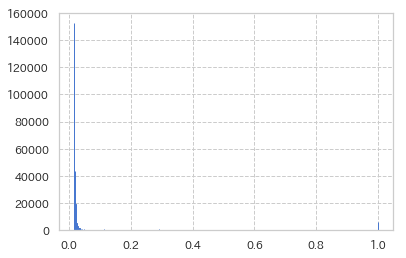

In [22]:
plt.hist(pd.read_csv('../output/sub_723_splitting_preditction.py.csv')['isFraud'], bins=1000, edgecolor='b');

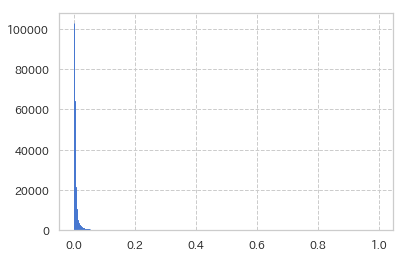

In [24]:
plt.hist(pd.read_csv('../output/sub_923_addf206feature_from921.py.csv')['isFraud'], bins=1000, edgecolor='b');

In [28]:
pd.read_csv('../output/sub_723_splitting_preditction.py.csv')['isFraud']

0         0.000818
1         0.002510
2         0.001245
3         0.001042
4         0.001892
5         0.001341
6         0.006822
7         0.007955
8         0.000283
9         0.004091
10        0.003155
11        0.002163
12        0.009463
13        0.001402
14        0.001041
15        0.003641
16        0.006060
17        0.002267
18        0.003615
19        0.005622
20        0.006110
21        0.003645
22        0.003762
23        0.002091
24        0.008098
25        0.026424
26        0.008113
27        0.002558
28        0.002405
29        0.005309
            ...   
506661    0.001684
506662    0.011286
506663    0.001520
506664    0.004161
506665    0.009839
506666    0.003551
506667    0.006077
506668    0.000827
506669    0.017276
506670    0.002540
506671    0.003026
506672    0.001911
506673    0.001555
506674    0.003270
506675    0.022535
506676    0.026215
506677    0.004665
506678    0.000996
506679    0.006578
506680    0.006420
506681    0.014073
506682    0.

In [29]:
pd.read_csv('../output/sub_923_addf206feature_from921.py.csv')['isFraud']

0         0.000847
1         0.002313
2         0.001379
3         0.001048
4         0.002300
5         0.001334
6         0.008266
7         0.006681
8         0.000317
9         0.004796
10        0.003440
11        0.002344
12        0.009791
13        0.001483
14        0.001030
15        0.003597
16        0.005412
17        0.002814
18        0.004613
19        0.006079
20        0.007313
21        0.003571
22        0.004633
23        0.002139
24        0.008015
25        0.026258
26        0.009462
27        0.002516
28        0.002521
29        0.006013
            ...   
506661    0.001455
506662    0.010167
506663    0.001664
506664    0.004159
506665    0.010805
506666    0.004276
506667    0.006224
506668    0.001009
506669    0.018426
506670    0.002816
506671    0.003510
506672    0.001743
506673    0.001665
506674    0.003420
506675    0.023689
506676    0.028780
506677    0.005327
506678    0.001001
506679    0.007055
506680    0.007426
506681    0.012939
506682    0.

In [53]:
def my_split(X_train):
    trn_idx = X_train[X_train['DT_M'] < 17].index
    val_idx = X_train[X_train['DT_M'] == 17].index

    return trn_idx, val_idx

In [54]:
trn_idx, val_idx = my_split(train)

In [60]:
np.save('../feature/trn_idx.npy', trn_idx)

In [61]:
np.save('../feature/val_idx.npy', val_idx)

In [62]:
len(trn_idx)

501214

In [63]:
len(np.load('../feature/trn_idx.npy'))

501214

In [65]:
pd.read_csv('../output/sub_730_high_kernel_changeLBO.py.csv')

,TransactionID,isFraud
0,3663549,0.002075
1,3663550,0.002290
2,3663551,0.001953
3,3663552,0.003129
4,3663553,0.002265
5,3663554,0.004078
6,3663555,0.015953
7,3663556,0.033019
8,3663557,0.000578
9,3663558,0.003425


In [68]:
feather.read_dataframe('LOG/tr_preds/oof_923_addf206feature_from921.py.ftr')

,true,preds
0,0,0.010032
1,0,0.004661
2,0,0.002468
3,0,0.002066
4,0,0.000738
5,0,0.001205
6,0,0.002983
7,0,0.140896
8,0,0.000357
9,0,0.000867


In [70]:
'tmp.py'[:-3]

'tmp'

In [76]:
train.groupby('DT_M').agg({'isFraud': 'mean'})

,isFraud
DT_M,
12,0.025852
13,0.040017
14,0.040072
15,0.039545
16,0.033806
17,0.034861


In [77]:
train.groupby('DT_M').agg({'isFraud': 'mean'})['isFraud'] + 1

DT_M
12    1.025852
13    1.040017
14    1.040072
15    1.039545
16    1.033806
17    1.034861
Name: isFraud, dtype: float64